In [1]:
# -*- coding: utf-8 -*-
%pylab inline
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.esda.mapclassify import User_Defined

Populating the interactive namespace from numpy and matplotlib


We have some questions:
* What is the distribution of votes at the municipal level?
* How does the distribution of abstentionism look like?
* Is abstentionism correlated with any particular election outcome?
* What where the most divided municipalities (regardless of the outcome)?
* What is the distribution of the YES and the NO outcomes?

In [2]:
datos = pd.read_excel('Datos/Base_Elecciones_dta.xlsx')
#datps = gp.GeoDataFrame(datos)
mpios = gp.read_file('Datos/mpio/mpio.shp')
datos = gp.GeoDataFrame(datos)
mpios['cod_danelong'] = mpios['MPIOS'].astype('int')
deptos = gp.read_file('Datos/depto/depto.shp')

In [3]:
datos = datos.merge(mpios,on='cod_danelong')

In [4]:
datos['porcentaje_si'] = pd.Series() 
datos['porcentaje_si'][datos['ganador1si2no']==1] = datos['porcentaje_ganador']
datos['porcentaje_si'][datos['ganador1si2no']==2] = 1. - datos['porcentaje_ganador']
datos['porcentaje_no'] = pd.Series() 
datos['porcentaje_no'][datos['ganador1si2no']==2] = datos['porcentaje_ganador']
datos['porcentaje_no'][datos['ganador1si2no']==1] = 1. - datos['porcentaje_ganador']
datos['division'] = abs(datos.porcentaje_si-datos.porcentaje_no)

/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/

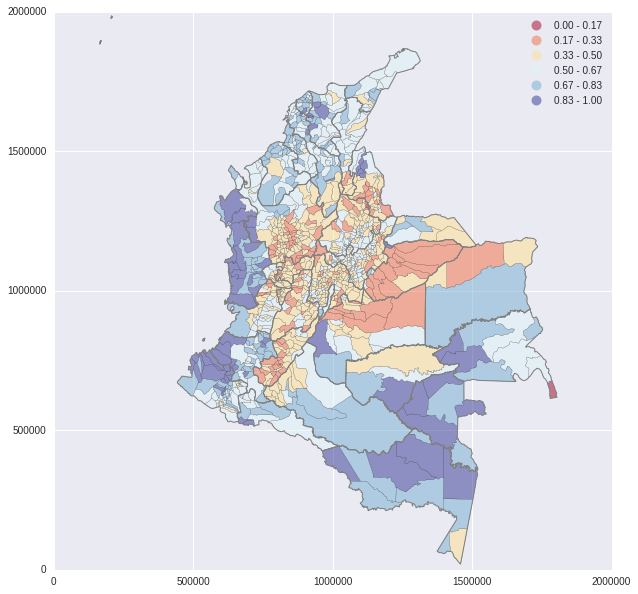

In [5]:
figsize=(10,10)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
datos.plot('porcentaje_si',cmap='RdYlBu',linewidth=0.1,scheme='equal_interval',legend=True,k=6,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,c='grey',ax=ax)
plt.savefig('Porcentaje_si.png')

/home/saf537/anaconda2/lib/python2.7/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "quantile". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


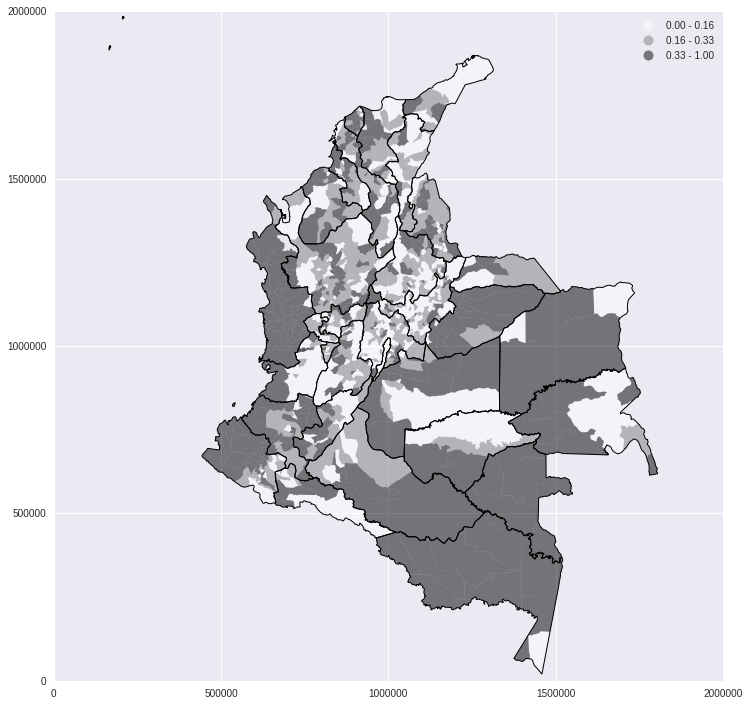

In [6]:
figsize=(12,12)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
datos.plot('division',cmap='gray_r',linewidth=0.0,scheme='quantile',legend=True,k=3,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,ax=ax)
plt.savefig('Division.png')

In [8]:
datos_compl = pd.read_excel('Datos/adm_municipios2.xls')
datos_compl['cod_danelong'] = datos_compl['divipola 2']
deptos = gp.read_file('Datos/depto/depto.shp')

In [9]:
datos = datos.merge(datos_compl,on='cod_danelong')


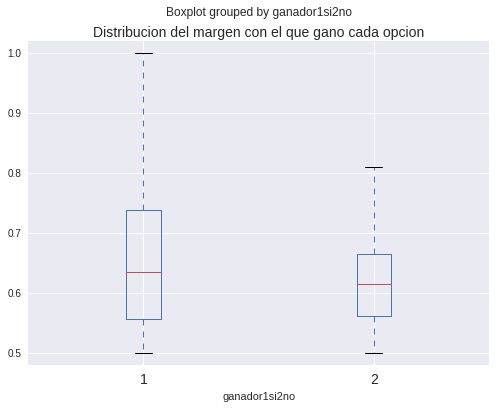

In [10]:
ax = datos.boxplot('porcentaje_ganador',by='ganador1si2no',fontsize=14,figsize=(8,6))
ax.set_ylim([0.48,1.02])
ax.set_title('Distribucion del margen con el que gano cada opcion',fontsize=14)

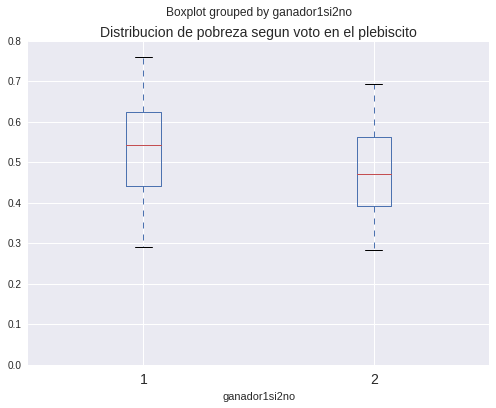

In [11]:
ax = datos.boxplot('pobreza 2005',by='ganador1si2no',fontsize=14,figsize=(8,6))
#ax.set_ylim([0.48,1.02])
ax.set_title('Distribucion de pobreza segun voto en el plebiscito',fontsize=14)

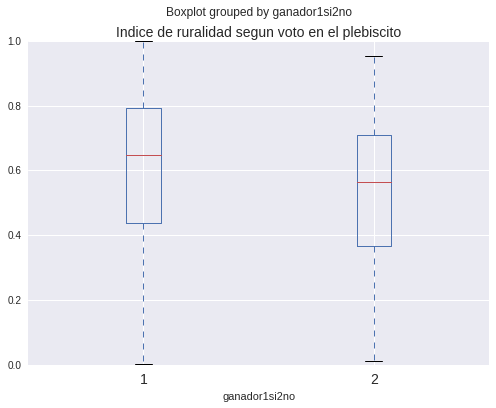

In [12]:
ax = datos.boxplot('ind ruralidad 2014',by='ganador1si2no',fontsize=14,figsize=(8,6))
#ax.set_ylim([0.48,1.02])
ax.set_title('Indice de ruralidad segun voto en el plebiscito',fontsize=14)

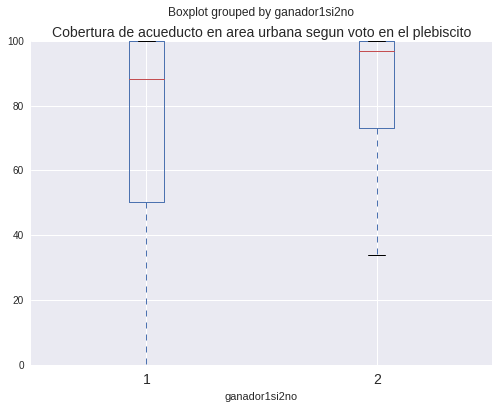

In [13]:
# Correlacion con tamanio? - en todo caso se debe a la geografia, son zonas con mas "estado"
ax = datos.boxplot('Cobertura total en area urbana de acueducto',by='ganador1si2no',fontsize=14,figsize=(8,6))
#ax.set_ylim([0.48,1.02]
ax.set_title('Cobertura de acueducto en area urbana segun voto en el plebiscito',fontsize=14)

In [14]:
datos.groupby(datos['ganador1si2no']).agg('mean')[[u'votos_ganador',u'AREA',u'HECTARES',u'PERIMETER',
                                        u'AREA_OFICI',u'pobreza 2005',u'cobertura salud',u'Cobertura total en area urbana de acueducto',
                                u'ind ruralidad 2014',u'homicidios 2014',u'Gini 2005',u'NBI 2005']]

,votos_ganador,AREA,HECTARES,PERIMETER,AREA_OFICI,pobreza 2005,cobertura salud,Cobertura total en area urbana de acueducto,ind ruralidad 2014,homicidios 2014,Gini 2005,NBI 2005
ganador1si2no,,,,,,,,,,,,
1,7002.025952,1.357890e+09,135789.045318,143924.572354,1365.930796,0.495202,0.762350,69.832647,0.600496,24.415111,0.418717,53.576678
2,6544.029197,6.548830e+08,65488.298684,102049.000483,646.711679,0.459684,0.726414,81.128558,0.526935,26.636810,0.428414,35.480657


In [15]:
deptos.columns

Index([u'AREA', u'DPTO', u'HECTARES', u'NOMBRE_DPT', u'PERIMETER',
       u'geometry'],
      dtype='object')

In [16]:
deptos['Nombre_D']= ['Antioquia','Atlantico','BogotaD','Bolivar','Boyaca','Caldas','Caqueta','Cauca','Cesar', 'Cordoba',
                     'Cundinamarca','Choco','Huila','La Guajira','Magdalena','Meta','Narino','Norte de Santander','Quindio',
                     'Risaralda','Santander','Sucre','Tolima','Valle del Cauca','Arauca','Casanare','Putumayo',
                     'Amazonas', 'Guainia', 'Guaviare','Vaupes','Vichada','San Andres y Providencia']

In [17]:
resultados_depto = pd.read_csv('Datos/Resultados plebiscito_depto.csv')
resultados_depto['Nombre_D']=resultados_depto['Province']
deptos = deptos.merge(resultados_depto,on='Nombre_D')

In [18]:
deptos['Contribucion_invalidos'] = 100*deptos['Votos no cuentan']/deptos['Votantes hab']
deptos['abstencion'] = 1. - deptos['votantes%']

In [19]:
deptos.head()

,AREA,DPTO,HECTARES,NOMBRE_DPT,PERIMETER,geometry,Nombre_D,Province,Si,No,votacion,Votantes hab,Si%,No%,Dif%,Votos no cuentan,votantes%,Contribucion_invalidos,abstencion
0,6.335186e+10,05,6335185.555,ANTIOQUIA,1963728.843,"POLYGON ((754872.1457743698 1445316.566551668,...",Antioquia,Antioquia,648051,1057518,1742139,4539316,0.379962,0.620038,0.240076,36570,0.383789,0.805628,0.616211
1,3.360765e+09,08,336076.535,ATLANTICO,240936.172,"POLYGON ((913511.1632650706 1637374.171875066,...",Atlantico,Atlantico,258121,168300,430989,1788211,0.605320,0.394680,0.210639,4568,0.241017,0.255451,0.758983
2,1.650948e+09,11,165094.778,SANTAFE DE BOGOTA D.C,323322.540,"POLYGON ((1006435.805163531 1021680.391597671,...",BogotaD,BogotaD,1423612,1114933,2570359,5547172,0.560798,0.439202,0.121597,31814,0.463364,0.573517,0.536636
3,2.614189e+10,13,2614189.453,BOLIVAR,1309427.968,"POLYGON ((881889.9007920363 1644370.282262522,...",Bolivar,Bolivar,208019,137307,350488,1502228,0.602384,0.397616,0.204769,5162,0.233312,0.343623,0.766688
4,2.335258e+10,15,2335258.246,BOYACA,1364539.911,"POLYGON ((1206427.930159722 1268967.315438251,...",Boyaca,Boyaca,188840,18817,387666,928625,0.909384,0.090616,0.818768,180009,0.417462,19.384466,0.582538


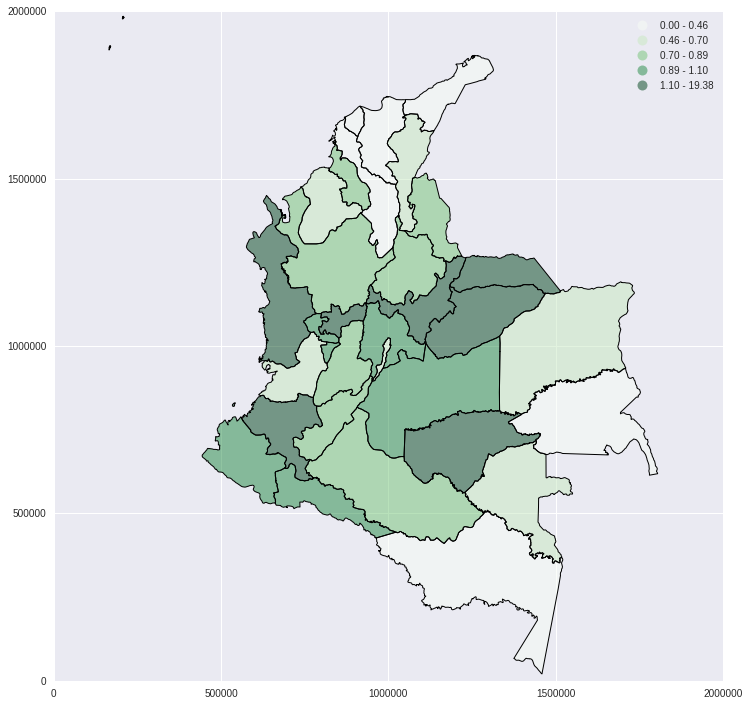

In [20]:
figsize=(12,12)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
deptos.plot('Contribucion_invalidos',cmap='Greens',linewidth=0.0,scheme='quantile',legend=True,k=5,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,ax=ax)
plt.savefig('Votos_invalidos.png')

(-1000, 200000)

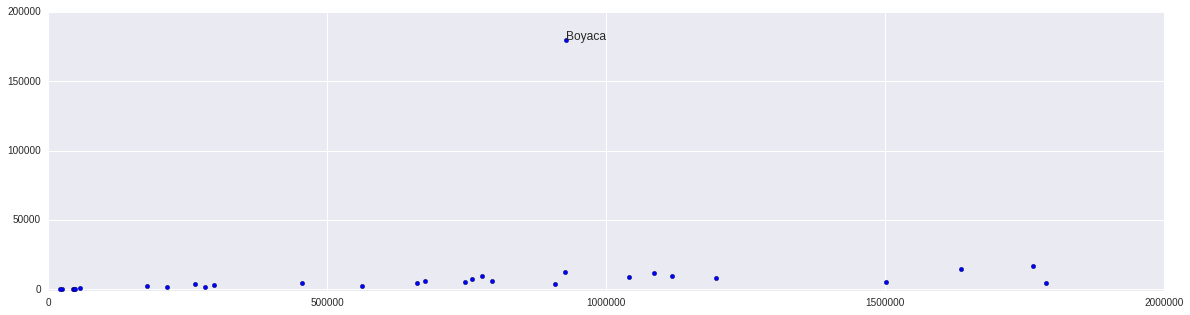

In [30]:
fig, ax = plt.subplots(figsize=(20,5))
#ax.set_xlim([0,2000000])
ax.scatter(deptos['Votantes hab'],deptos['Votos no cuentan'])
ax.annotate('Boyaca',(deptos[deptos['Nombre_D']=='Boyaca']['Votantes hab'],deptos[deptos['Nombre_D']=='Boyaca']['Votos no cuentan']))
ax.set_xlim([-100,2000000])
ax.set_ylim([-1000,200000])

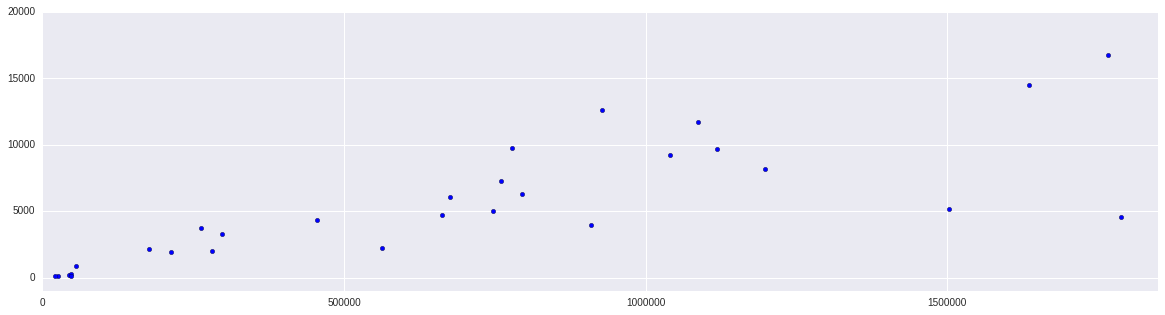

In [42]:
fig, ax = plt.subplots(figsize=(20,5))
#ax.set_xlim([0,2000000])
ax.set_xlim([-100,1850000])
ax.set_ylim([-1000,20000])
ax.scatter(deptos['Votantes hab'],deptos['Votos no cuentan'])
#for i, txt in enumerate(deptos['Nombre_D']):
#    ax.annotate(txt,(log(deptos['Votantes hab'][i]),deptos['Votos no cuentan'][i]))

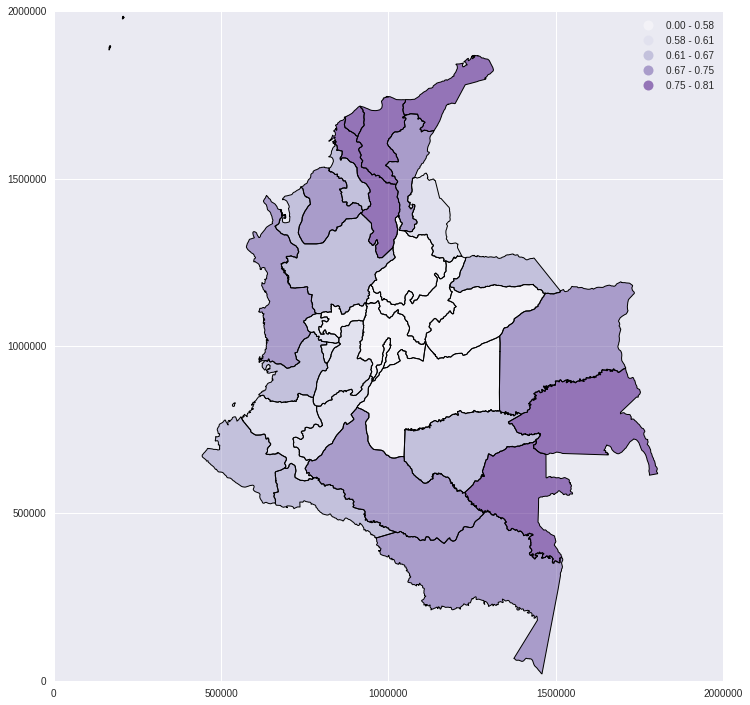

In [22]:
figsize=(12,12)
fig, ax = plt.subplots(1, 1, figsize = (figsize))
deptos.plot('abstencion',cmap='Purples',linewidth=0.0,scheme='quantile',legend=True,k=5,ax=ax)
deptos.plot(alpha=0.0,linewidth=1,ax=ax)
plt.savefig('Abstencion.png')